In [5]:
import os
import types

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

from src.visualization.toy_example import plot_moons, plot_multiclass, show_density_grid, show_acquisition_grid, plot_performance_curves
from src.data.toy_example import generate_moons, generate_multiclass
from src.methods.acquisition_functions import EPIG, GeneralEPIG
from src.methods.target_input_distribution import MultivariateGaussian

from src.models.utils import GP_sample
from src.methods.toy_example import run_active_learning_loop_toy


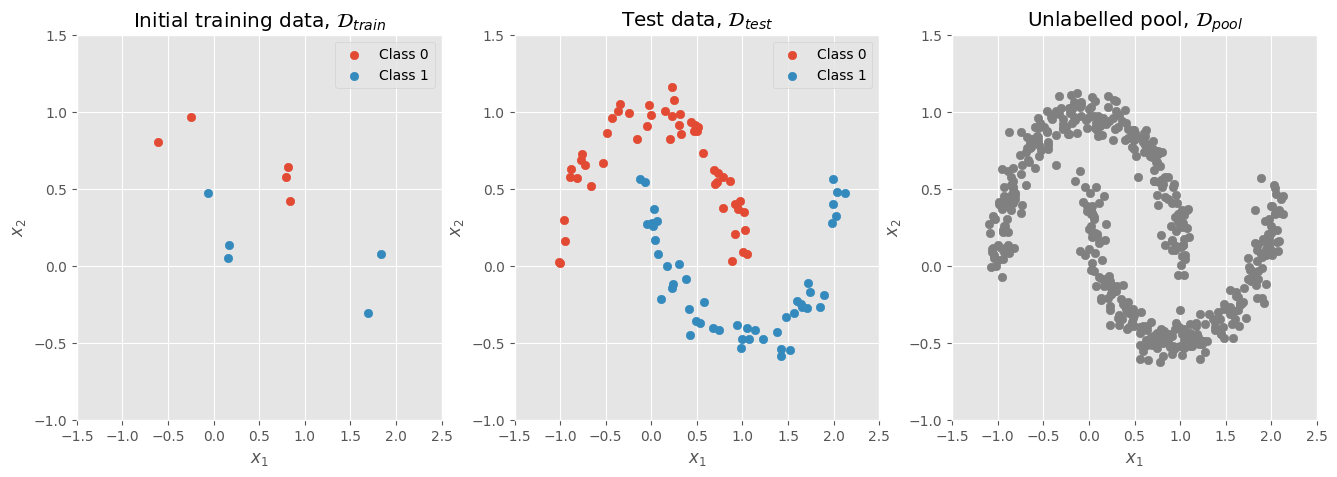

In [6]:
np.random.seed(0)

# Define dataset sizes
N_initial   = 5
N_test      = 100
N_pool      = 500
num_classes = 2

# Generate dataset partitions
Xtrain, ytrain, Xtest, ytest, Xpool, ypool = generate_moons(N_initial_per_class=N_initial, N_test=N_test, N_pool=N_pool)

# Plot the dataset partitions
plot_moons(Xtrain, ytrain, Xtest, ytest, Xpool, ypool)

In [7]:
# Define model
model           = GaussianProcessClassifier(1.0 * RBF(1.0))
model.sample    = types.MethodType( GP_sample, model )

# Train model
model.fit(Xtrain, ytrain)
# Show performance
print(f"ACCURACY\n  -> train: {model.score(Xtrain, ytrain)}\n  -> test: {model.score(Xtest, ytest)}")

ACCURACY
  -> train: 1.0
  -> test: 1.0


### Check running time of my implementation vs. the one from the authors

In [5]:
%%timeit
target_input_dist = MultivariateGaussian(mu=[0,0], Sigma=np.eye(2))

# Define acquisition function
acq_fun = EPIG(
    query_n_points=None, 
    target_input_distribution=target_input_dist,
    n_posterior_samples=5000,
    n_target_input_samples=100,
    version='mine',
)

# Get acquisition function score and the items to query
_, query_idxs = acq_fun(Xpool, model=model)

In [6]:
%%timeit
target_input_dist = MultivariateGaussian(mu=[0,0], Sigma=np.eye(2))

# Define acquisition function
acq_fun = EPIG(
    query_n_points=None, 
    target_input_distribution=target_input_dist,
    n_posterior_samples=5000,
    n_target_input_samples=100,
    version='theirs',
)

# Get acquisition function score and the items to query
_, query_idxs = acq_fun(Xpool, model=model)

### Visual inspection of changing the number of posterior samples, target input distribution samples and the mean of the target input distribution

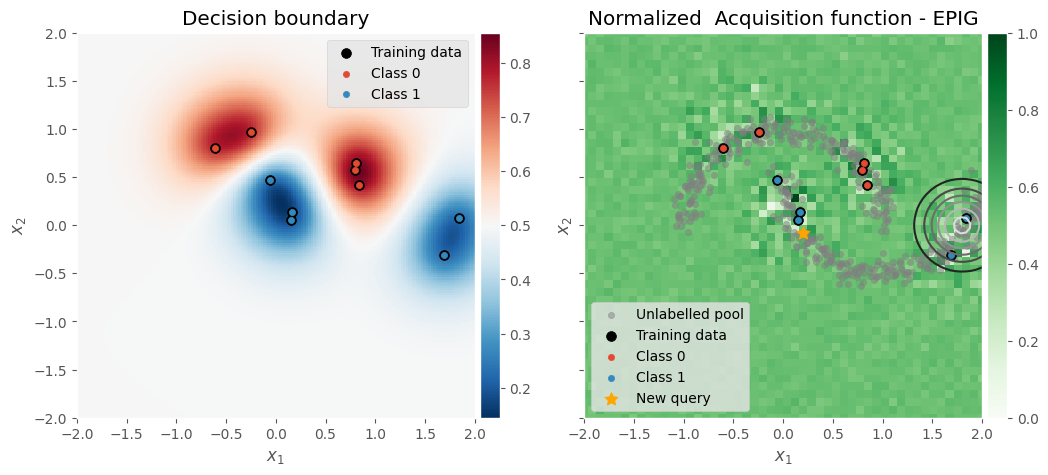

In [9]:
target_input_dist = MultivariateGaussian(mu=[1.8, 0], Sigma=np.eye(2) / 4)

# Define acquisition function
acq_fun = GeneralEPIG(
    query_n_points=None, 
    target_input_distribution=target_input_dist,
    n_posterior_samples=1000,
    n_target_input_samples=20,
    version='mine',
)

# Get acquisition function score and the items to query
_, query_idxs = acq_fun(Xpool, model=model)
next_query = Xpool[query_idxs[0]]


### PLOT DECISION BOUNDARY AND ACQUISITION FUNCTION ###
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True, sharex=True)

# Plot model uncertainty across grid
axs[0] = show_density_grid(model, Xtrain, Xtest, ytrain, ytest, ax=axs[0], fig=fig)
axs[0].legend()

# Plot acquisition function across a grid
axs[1] = show_acquisition_grid(model, acq_fun, Xtrain, ytrain, Xpool, P=50, ax=axs[1], fig=fig, normalize=True)
axs[1].scatter(next_query[0], next_query[1], color='orange', marker=(5, 1), s=100, label='New query')
axs[1].legend()

# Plot target input distribution on top
target_input_dist.plot_2D(ax=axs[1], zoom=([-2, 3], [-2, 2.5]))

plt.show()

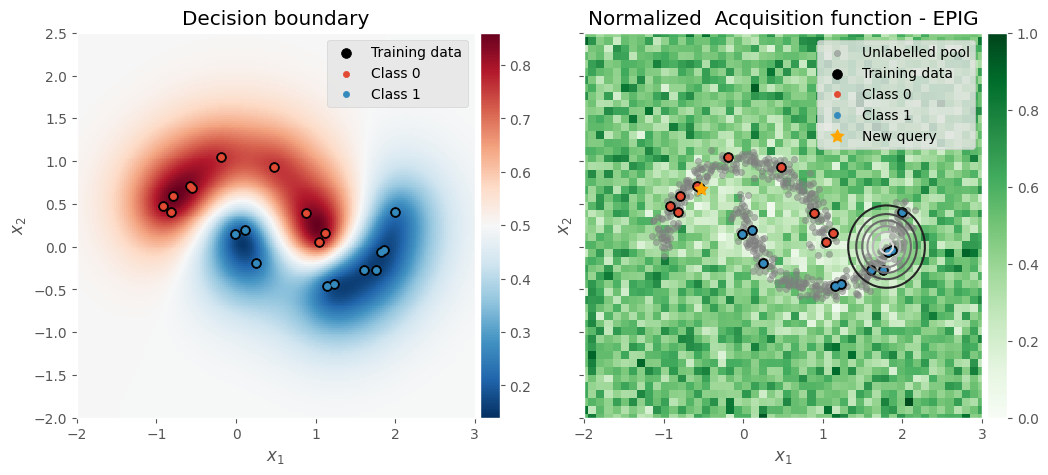

In [8]:
target_input_dist = MultivariateGaussian(mu=[1.8, 0], Sigma=np.eye(2) / 4)

# Define acquisition function
acq_fun = EPIG(
    query_n_points=None, 
    target_input_distribution=target_input_dist,
    n_posterior_samples=100,
    n_target_input_samples=100,
    version='mine',
)

# Get acquisition function score and the items to query
_, query_idxs = acq_fun(Xpool, model=model)
next_query = Xpool[query_idxs[0]]


### PLOT DECISION BOUNDARY AND ACQUISITION FUNCTION ###
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True, sharex=True)

# Plot model uncertainty across grid
axs[0] = show_density_grid(model, Xtrain, Xtest, ytrain, ytest, ax=axs[0], fig=fig)
axs[0].legend()

# Plot acquisition function across a grid
axs[1] = show_acquisition_grid(model, acq_fun, Xtrain, ytrain, Xpool, P=50, ax=axs[1], fig=fig)
axs[1].scatter(next_query[0], next_query[1], color='orange', marker=(5, 1), s=100, label='New query')
axs[1].legend()

# Plot target input distribution on top
target_input_dist.plot_2D(ax=axs[1], zoom=([-2, 3], [-2, 2.5]))

plt.show()

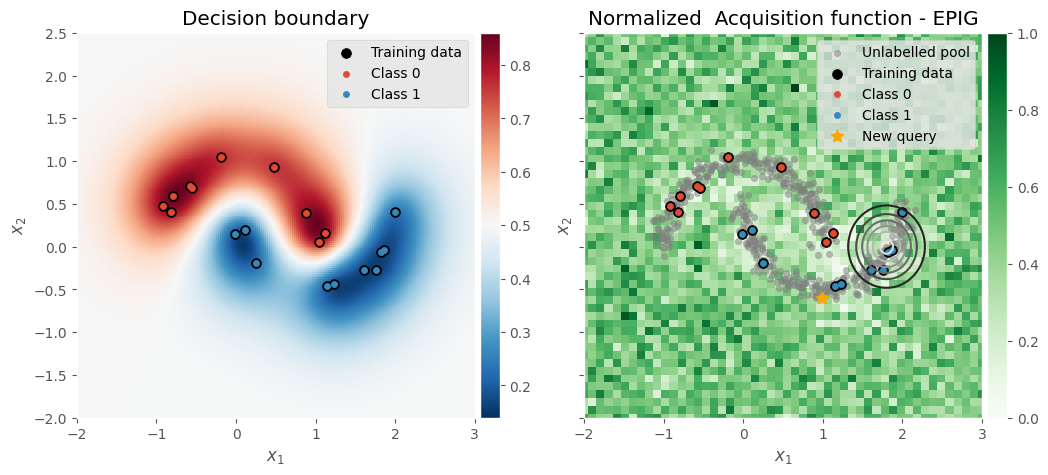

In [7]:
target_input_dist = MultivariateGaussian(mu=[1.8, 0], Sigma=np.eye(2) / 4)

# Define acquisition function
acq_fun = EPIG(
    query_n_points=None, 
    target_input_distribution=target_input_dist,
    n_posterior_samples=5000,
    n_target_input_samples=100,
    version='mine',
)

# Get acquisition function score and the items to query
_, query_idxs = acq_fun(Xpool, model=model)
next_query = Xpool[query_idxs[0]]


### PLOT DECISION BOUNDARY AND ACQUISITION FUNCTION ###
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True, sharex=True)

# Plot model uncertainty across grid
axs[0] = show_density_grid(model, Xtrain, Xtest, ytrain, ytest, ax=axs[0], fig=fig)
axs[0].legend()

# Plot acquisition function across a grid
axs[1] = show_acquisition_grid(model, acq_fun, Xtrain, ytrain, Xpool, P=50, ax=axs[1], fig=fig)
axs[1].scatter(next_query[0], next_query[1], color='orange', marker=(5, 1), s=100, label='New query')
axs[1].legend()

# Plot target input distribution on top
target_input_dist.plot_2D(ax=axs[1], zoom=([-2, 3], [-2, 2.5]))

plt.show()

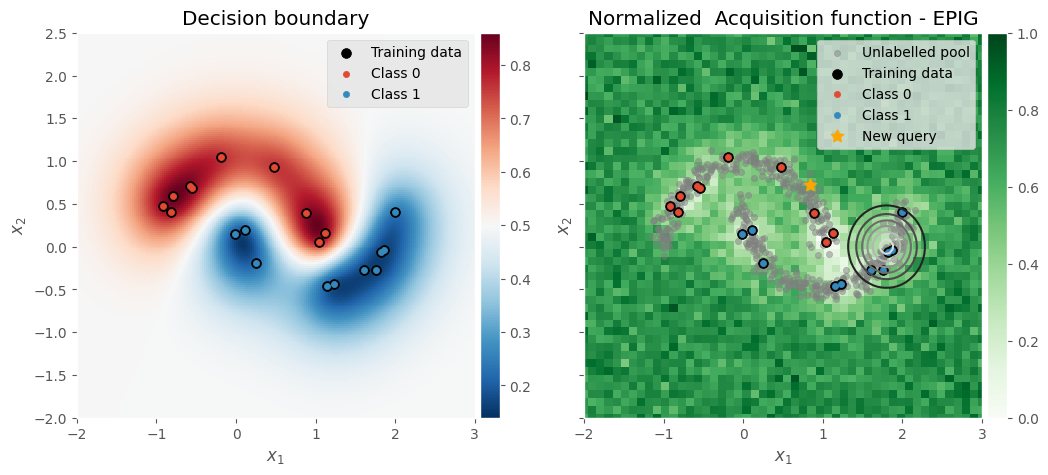

In [6]:
target_input_dist = MultivariateGaussian(mu=[1.8, 0], Sigma=np.eye(2) / 4)

# Define acquisition function
acq_fun = EPIG(
    query_n_points=None, 
    target_input_distribution=target_input_dist,
    n_posterior_samples=1000,
    n_target_input_samples=1000,
    version='mine',
)

# Get acquisition function score and the items to query
_, query_idxs = acq_fun(Xpool, model=model)
next_query = Xpool[query_idxs[0]]


### PLOT DECISION BOUNDARY AND ACQUISITION FUNCTION ###
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True, sharex=True)

# Plot model uncertainty across grid
axs[0] = show_density_grid(model, Xtrain, Xtest, ytrain, ytest, ax=axs[0], fig=fig)
axs[0].legend()

# Plot acquisition function across a grid
axs[1] = show_acquisition_grid(model, acq_fun, Xtrain, ytrain, Xpool, P=50, ax=axs[1], fig=fig)
axs[1].scatter(next_query[0], next_query[1], color='orange', marker=(5, 1), s=100, label='New query')
axs[1].legend()

# Plot target input distribution on top
target_input_dist.plot_2D(ax=axs[1], zoom=([-2, 3], [-2, 2.5]))

plt.show()

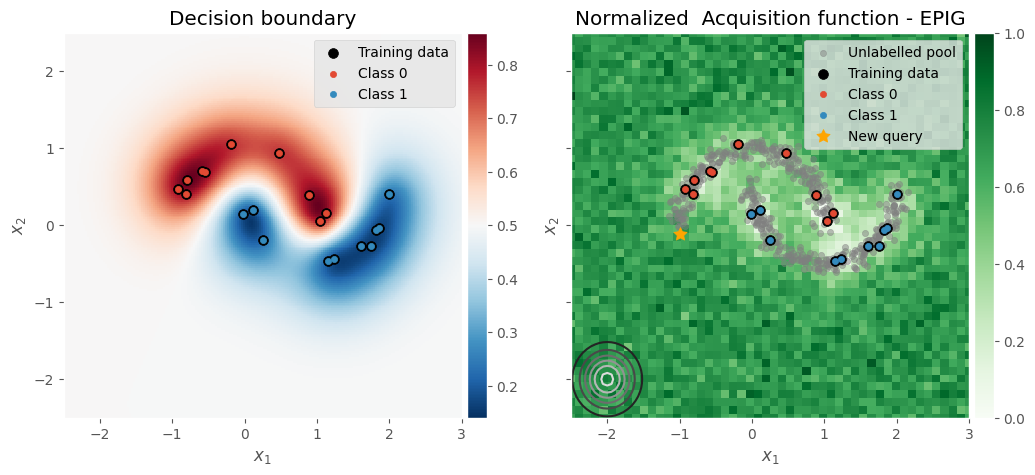

In [10]:
target_input_dist = MultivariateGaussian(mu=[-2, -2], Sigma=np.eye(2) / 4)

# Define acquisition function
acq_fun = EPIG(
    query_n_points=None, 
    target_input_distribution=target_input_dist,
    n_posterior_samples=1000,
    n_target_input_samples=1000,
    version='mine',
)

# Get acquisition function score and the items to query
_, query_idxs = acq_fun(Xpool, model=model)
next_query = Xpool[query_idxs[0]]


### PLOT DECISION BOUNDARY AND ACQUISITION FUNCTION ###
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True, sharex=True)

# Plot model uncertainty across grid
axs[0] = show_density_grid(model, Xtrain, Xtest, ytrain, ytest, ax=axs[0], fig=fig)
axs[0].legend()

# Plot acquisition function across a grid
axs[1] = show_acquisition_grid(model, acq_fun, Xtrain, ytrain, Xpool, P=50, ax=axs[1], fig=fig)
axs[1].scatter(next_query[0], next_query[1], color='orange', marker=(5, 1), s=100, label='New query')
axs[1].legend()

# Plot target input distribution on top
target_input_dist.plot_2D(ax=axs[1], zoom=([-2.5, 3], [-2.5, 2.5]))

plt.show()

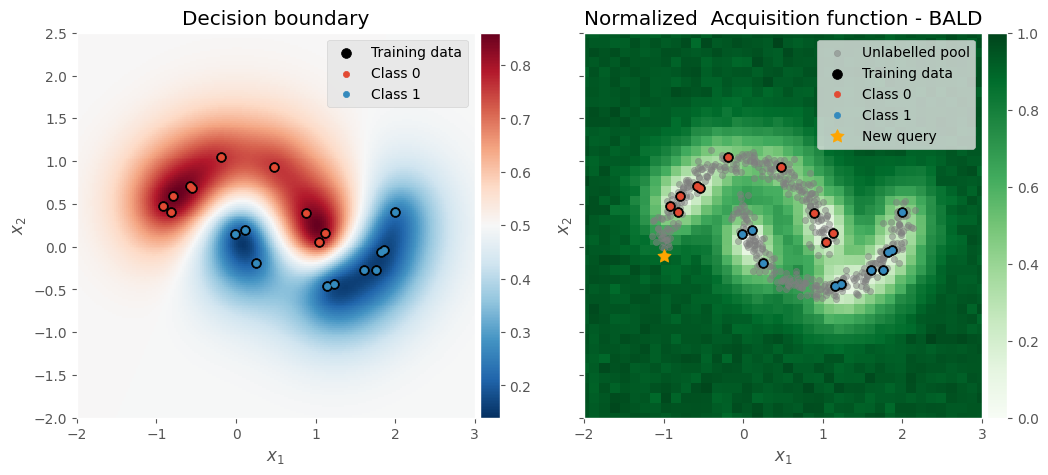

In [12]:
from src.methods.acquisition_functions import BALD

# Define acquisition function
acq_fun = BALD(
    query_n_points=None, 
    n_posterior_samples=1000,
)

# Get acquisition function score and the items to query
_, query_idxs = acq_fun(Xpool, model=model)
next_query = Xpool[query_idxs[0]]

### PLOT DECISION BOUNDARY AND ACQUISITION FUNCTION ###
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True, sharex=True)

# Plot model uncertainty across grid
axs[0] = show_density_grid(model, Xtrain, Xtest, ytrain, ytest, ax=axs[0], fig=fig)
axs[0].legend()

# Plot acquisition function across a grid
axs[1] = show_acquisition_grid(model, acq_fun, Xtrain, ytrain, Xpool, P=40, ax=axs[1], fig=fig)
axs[1].scatter(next_query[0], next_query[1], color='orange', marker=(5, 1), s=100, label='New query')
axs[1].legend()

plt.show()

### Run active learning loop
__OBS:__ Use python script file instead - much faster!

### Neural network model

In [1]:
# import os
# import types
# from tqdm import tqdm

# import matplotlib.pyplot as plt
# plt.style.use('ggplot')

# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.nn.functional import log_softmax, nll_loss, softmax

# from sklearn.gaussian_process import GaussianProcessClassifier
# from sklearn.gaussian_process.kernels import RBF

# from src.visualization.toy_example import plot_moons, plot_multiclass, show_density_grid, show_acquisition_grid, plot_performance_curves
# from src.data.toy_example import generate_moons, generate_multiclass
# from src.methods.acquisition_functions import EPIG, GeneralEPIG
# from src.methods.target_input_distribution import MultivariateGaussian

# from src.models.utils import GP_sample
# from src.methods.toy_example import run_active_learning_loop_toy

# import autograd.numpy as np
# from autograd import hessian
# from autograd.misc import flatten


In [9]:
# class SimpleNet(nn.Module):
#     def __init__(self, num_classes: int = 2):
#         super(SimpleNet, self).__init__()
#         self.fc1        = nn.Linear(2, 32)
#         self.fc2        = nn.Linear(32, 32)
#         self.fc3        = nn.Linear(32, num_classes)
#         self.dropout    = nn.Dropout(p=0.5)
#         self.num_classes= num_classes

#     def forward(self, x: torch.FloatTensor):
#         x = torch.relu(self.fc1(x))
#         x = torch.relu(self.fc2(x))
#         x = self.fc3(x)
#         return x

#     def predict_proba(self, x: np.ndarray):
#         x       = torch.FloatTensor(x)
#         outputs = self.forward(x)
#         return softmax(outputs, dim=1).numpy()
    
#     def sample(self, X: np.ndarray, n_samples: int = 1000, seed: int = 0):
#         np.random.seed(seed)
#         torch.manual_seed(seed)

#         X           = torch.FloatTensor(X)
#         outputs     = self.forward(X)
#         posterior_  = softmax(outputs, dim=1).view(self.num_classes, n_samples, -1).numpy()

#         return posterior_


# class SimpleMCDropout(nn.Module):
#     def __init__(self, num_classes: int = 2):
#         super(SimpleMCDropout, self).__init__()
#         self.fc1        = nn.Linear(2, 32)
#         self.fc2        = nn.Linear(32, 32)
#         self.fc3        = nn.Linear(32, num_classes)
#         self.dropout    = nn.Dropout(p=0.5)
#         self.num_classes= num_classes

#     def forward(self, x: torch.FloatTensor):
#         x = torch.relu(self.dropout(self.fc1(x)))
#         x = torch.relu(self.fc2(x))
#         x = self.fc3(x)
#         return x

#     def predict_proba(self, x: np.ndarray):
#         x       = torch.FloatTensor(x)
#         outputs = self.forward(x)
#         return softmax(outputs, dim=1).numpy()
    
#     def sample(self, X: np.ndarray, n_samples: int = 1000, seed: int = 0):
#         np.random.seed(seed)
#         torch.manual_seed(seed)

#         posterior_samples   = np.zeros((self.num_classes, n_samples, X.__len__()))
#         X                   = torch.FloatTensor(X)

#         self.train()
#         for n in range(n_samples):
#             outputs = self.forward(X)
#             posterior_samples[:, n, :] = softmax(outputs, dim=1).permute(1,0).numpy()

#         return posterior_samples


# from hessian import exact_hessian
# class SimpleLLLA(nn.Module):
#     def __init__(self, alpha=1., num_classes: int = 2):
#         super(SimpleLLLA, self).__init__()
        
#         self.fc1        = nn.Linear(2, 32)
#         self.fc2        = nn.Linear(32, 32)
#         self.fc3        = nn.Linear(32, num_classes)
#         self.dropout    = nn.Dropout(p=0.5)
        
#         self.alpha          = alpha
#         self.num_classes    = num_classes
#         self.LLLA_fitted    = False

#     def forward(self, x: torch.FloatTensor):
#         x = torch.relu(self.fc1(x))
#         x = torch.relu(self.fc2(x))
#         x = self.fc3(x)
#         return x

#     def predict_MAP_proba(self, x: np.ndarray):
#         x       = torch.FloatTensor(x)
#         outputs = self.forward(x)
#         return softmax(outputs, dim=1).numpy()
    
#     def predict_posterior_proba(self, x: np.ndarray, n_samples: int = 1000, seed: int = 0):
#         probs   = self.sample(X=x, n_samples=n_samples, seed=seed)
#         return probs.mean(axis=1).reshape(-1, self.num_classes)
    
#     def forward_first_layers(self, x: torch.FloatTensor):
#         x = torch.relu(self.fc1(x))
#         x = torch.relu(self.fc2(x))
#         return x
    
#     def forward_last_layer(self, last_params, first_layers_output):
#         """ implements the map from the activation of layer L-1 to the output of the network"""
    
#         W, b = last_params
#         return np.dot(first_layers_output, W) + b     
    
#     def log_lik_fun_multiclass(self, logits, y):
#         softmax_ = lambda x: np.exp(x) / np.exp(x).sum(axis=1, keepdims=True)
#         log_probs = np.log(softmax_(logits))
#         return log_probs[range(len(y)), y]

#     def fit_LLLA(self, Xtrain: torch.FloatTensor, ytrain: torch.LongTensor):
#         self.LLLA_fitted = True
        
#         # Extract parameters of the last layer
#         last_params = list(self.fc3.parameters())
#         last_params = [(last_params[0].data.permute(1,0).numpy()), (last_params[1].data.numpy())]

#         # Flatten parameters of the last layer to prepare for the approximation
#         self.w_last_flat, self.unflatten = flatten(last_params)

#         # Run input through first layers
#         with torch.no_grad():
#             z = self.forward_first_layers(Xtrain).cpu().numpy()
        
#         # Prepare for Hessian computation by constructing function for evaluating the last layer of the neural network
#         def last_layer_obj(w_, reduction='sum'):
#             p = self.unflatten(w_)                                  # unflatten
#             y = self.forward_last_layer(p, z)                       # map through last layer
#             if reduction == 'mean':
#                 return -self.log_lik_fun_multiclass(y, ytrain).mean()
#             else:
#                 return -self.log_lik_fun_multiclass(y, ytrain).sum()

#         # Check if my numpy implementation is identical to torch nll_loss
#         print(f"Numpy autograd implementation: \t{last_layer_obj(self.w_last_flat, reduction='mean')}")
#         print(f"Torch NLL implementation: \t{nll_loss(log_softmax(self.forward(Xtrain), dim=1), ytrain)}")

#         # compute Hessian of log likelihood
#         H_loglik = hessian(last_layer_obj)(self.w_last_flat, reduction='mean')

#         # comptue Hessian of log prior
#         H_logprior = self.alpha * np.identity(len(self.w_last_flat))

#         # compute Hessian of log joint
#         self.H = H_loglik + H_logprior

#         # Compute inverse Hessian
#         self.S = np.linalg.inv(self.H)

#         # Make sure the matrix is symmetric
#         if not np.all(self.S == self.S.T):
#             print(f"Maximum absolute difference between upper and lower matrix parts: {abs(self.S - self.S.T).max()}")

#             low_mask            = np.tril(np.ones(self.S.shape), k=-1) == 1
#             self.S[low_mask]    = self.S.T[low_mask]
#             assert np.all(self.S == self.S.T), "The matrix is still not symmetric..."

#     def sample(self, X: np.ndarray, n_samples: int = 1000, seed: int = 0):
#         """ Computes the samples from the LLLA predictive distribution using a pretrained model object 
#             and an LLLA approximation specificied by a mean vector w_LLLA_flat and a covariance matrix S_LLLA.
#             B denotes the number of parameters in the last layer

#         inputs:
#         X            ---    input points (np.array: P x D)
#         model        ---    NeuralNetwork object (pretrained) 
#         w_LLLA_flat  ---    vector of mean parameters for the last layer (np.array: B x 1)
#         S_LLLA_flat  ---    covarince matrix for the parameters of the last laeyr (np.array: (B x B))
#         num_samples  ---    number of samples to generate for each input

#         outputs:
#         preds_LLLA   ---    samples from the predictive distribution for each input in X (np.array: num_samples x P x 2)
#         """
#         assert self.LLLA_fitted, "You must explicitly fit the LLLA layer before trying to sample!" 
#         np.random.seed(seed)
#         torch.manual_seed(seed)
        
#         # feed input through first part of network
#         with torch.no_grad():
#             z = self.forward_first_layers(torch.FloatTensor(X)).cpu().numpy()
        
#         # first we will sample from the approximate posterior of the last layer
#         w_samples = np.random.multivariate_normal(self.w_last_flat, self.S, size=n_samples)

#         # compute predictions for each posterior sample
#         outputs_LLLA = torch.tensor(np.stack([self.forward_last_layer(self.unflatten(w_i), z) for w_i in w_samples]).reshape(self.num_classes, n_samples, -1))
#         return softmax(outputs_LLLA, dim=0).numpy()